In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt 
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchvision import datasets

import matplotlib.pyplot as plt

In [2]:
from tqdm.auto import tqdm 


In [3]:
# Download the dataset

train_data = datasets.CIFAR100(
    "data", train=True, download=True, transform=ToTensor(), target_transform=None
)

test_data = datasets.CIFAR100(
    "data", train=False, download=True, transform=ToTensor(), target_transform=None
)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
print("Train data: ", len(train_data))
print("Test data: ", len(test_data))

Train data:  50000
Test data:  10000


In [11]:
train_data[0][0].shape

torch.Size([3, 32, 32])

In [5]:
image , label = train_data[3]

In [6]:
class_to_label = train_data.class_to_idx    
(class_to_label)
class_to_label = {v: k for k, v in class_to_label.items()}

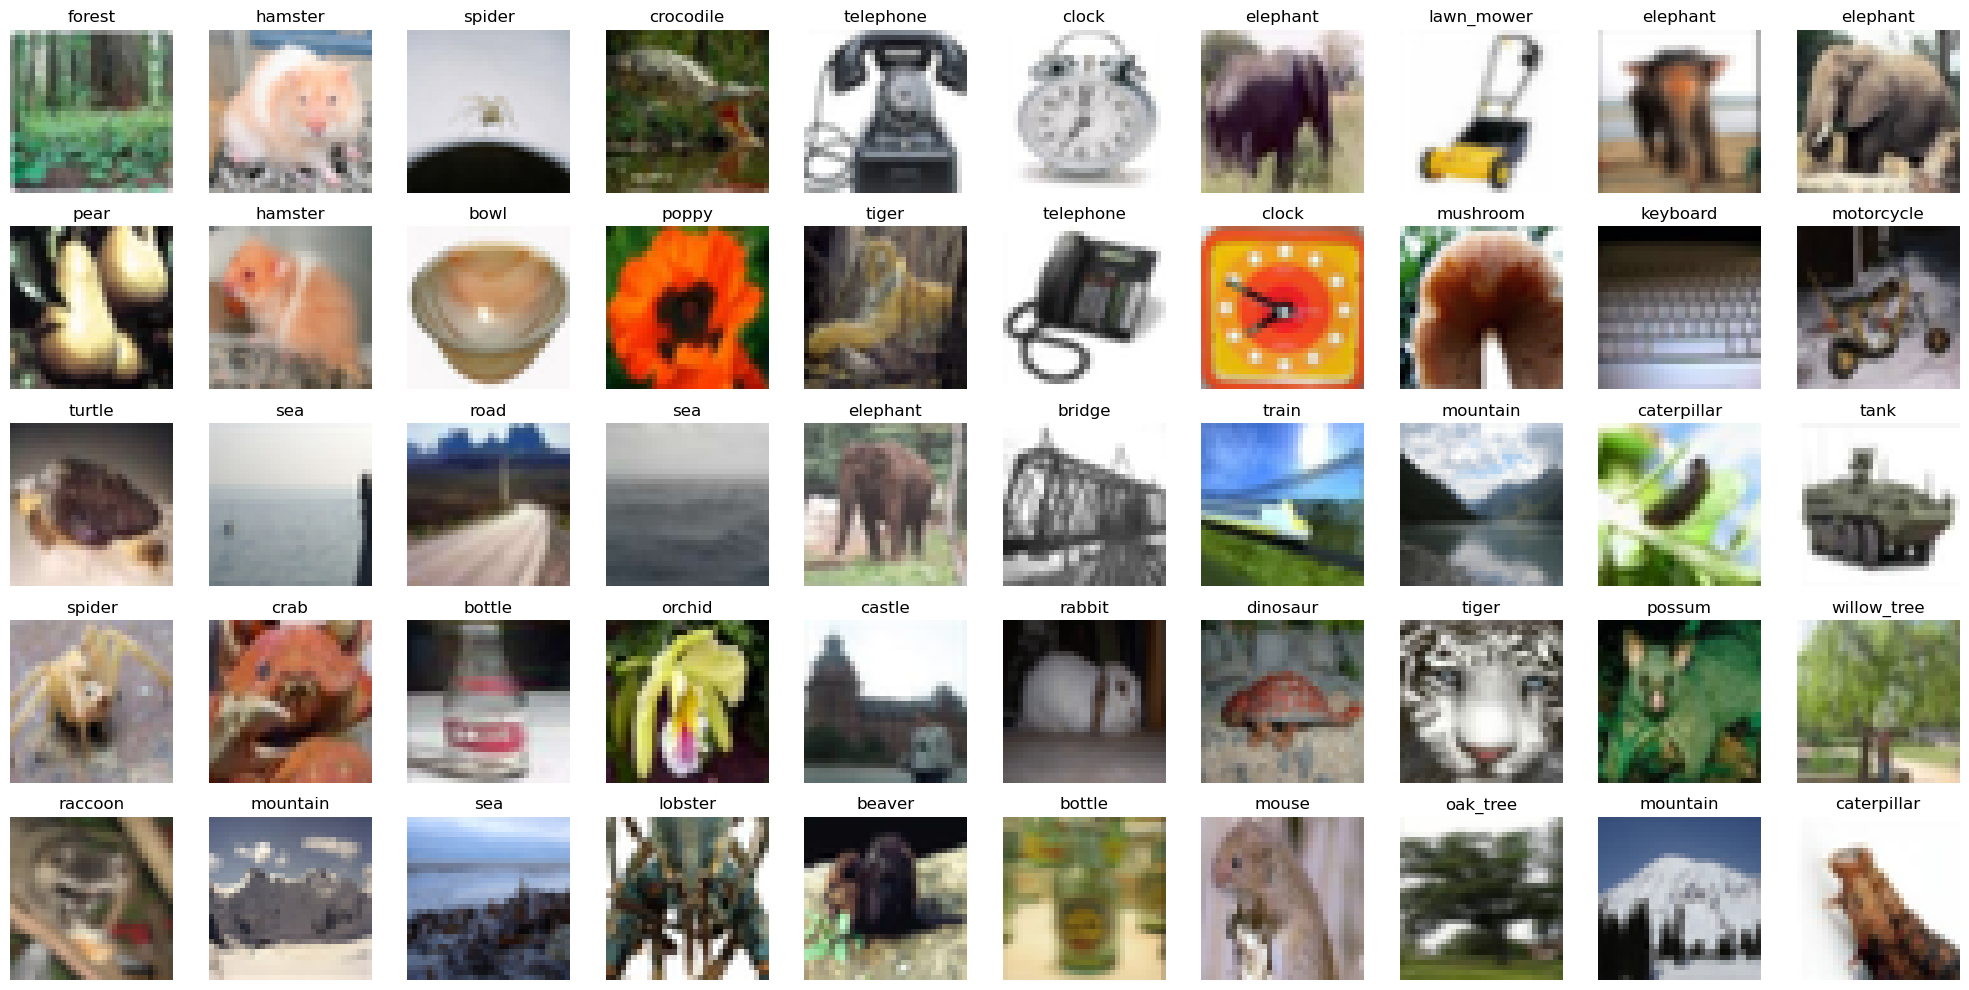

In [7]:
import random

# Set the number of images to display
num_images = 50

# Get random indices
random_indices = random.sample(range(len(train_data)), num_images)

# Plot the images in a 10x5 grid
fig, axes = plt.subplots(5, 10, figsize=(20, 10))
axes = axes.flatten()
for ax, idx in zip(axes, random_indices):
    image, label = train_data[idx]
    ax.imshow(image.permute(1, 2, 0))
    ax.set_title(class_to_label[label])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [8]:
train_data_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_data_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [9]:
print("Train data loader: ", len(train_data_loader))
print("Test data loader: ", len(test_data_loader))

Train data loader:  1563
Test data loader:  313


In [10]:
class pictureIdentificationModel(nn.Module):
    def __init__(self, input_shape, output_shape, hidden_layers):
        super().__init__()

        self.layer_1 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_layers),
            nn.Linear(in_features=hidden_layers, out_features=hidden_layers),
            nn.Linear(in_features=hidden_layers, out_features=output_shape),
        )
        
    def forward(self, x):
        x = self.layer_1(x)
        return x

In [12]:
model0 = pictureIdentificationModel(3*32*32, 100, 512)

In [15]:
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model0.parameters(), lr=0.001)

In [16]:
def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_true)) * 100
    return acc

In [17]:
EPOCHS = 10


TRAIN_LOSS = []
TEST_LOSS = []

TRAIN_ACC = []
TEST_ACC = []

In [32]:
model0 = model0.to("cuda")

In [37]:
for epoch in tqdm(range(EPOCHS)):

    print(f"Epoch {epoch+1} of {EPOCHS} \n ------------------------------")
    train_epoch_loss = 0
    train_acc = 0

    for batch, (X, y) in enumerate(train_data_loader):

        y_pred = model0(X.to("cuda"))

        loss = loss_function(y_pred, y.to("cuda"))

        train_acc += accuracy(y, torch.argmax(y_pred.cpu(), axis=1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        train_epoch_loss += loss.item()

        if batch % 100 == 0:
            print(f"Batch {batch} of {len(train_data_loader)}")

    train_epoch_loss = train_epoch_loss / len(train_data_loader)
    train_acc = train_acc / len(train_data_loader)

    TRAIN_LOSS.append(train_epoch_loss)
    TRAIN_ACC.append(train_acc)

    with torch.inference_mode():
        test_epoch_loss = 0
        test_acc = 0
        for X, y in test_data_loader:
            y_pred = model0(X.to("cuda"))
            loss = loss_function(y_pred, y.to("cuda"))
            test_epoch_loss += loss.item()
            test_acc += accuracy(y, torch.argmax(y_pred.cpu(), axis=1))
            
        test_epoch_loss = test_epoch_loss / len(test_data_loader)
        test_acc = test_acc / len(test_data_loader)
        
        TEST_LOSS.append(test_epoch_loss)
        TEST_ACC.append(test_acc)
    
    print(f"Train Loss: {train_epoch_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Test Loss: {test_epoch_loss:.4f}, Test Acc: {test_acc:.4f}")
    print("---------------------------------")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1 of 10 
 ------------------------------
Batch 0 of 1563
Batch 100 of 1563
Batch 200 of 1563
Batch 300 of 1563
Batch 400 of 1563
Batch 500 of 1563
Batch 600 of 1563
Batch 700 of 1563
Batch 800 of 1563
Batch 900 of 1563
Batch 1000 of 1563
Batch 1100 of 1563
Batch 1200 of 1563
Batch 1300 of 1563
Batch 1400 of 1563
Batch 1500 of 1563
Train Loss: 3.8104, Train Acc: 13.7516
Test Loss: 3.8341, Test Acc: 13.5284
---------------------------------
Epoch 2 of 10 
 ------------------------------
Batch 0 of 1563
Batch 100 of 1563
Batch 200 of 1563
Batch 300 of 1563
Batch 400 of 1563
Batch 500 of 1563
Batch 600 of 1563
Batch 700 of 1563
Batch 800 of 1563
Batch 900 of 1563
Batch 1000 of 1563
Batch 1100 of 1563
Batch 1200 of 1563
Batch 1300 of 1563
Batch 1400 of 1563
Batch 1500 of 1563
Train Loss: 3.7981, Train Acc: 14.1315
Test Loss: 3.8241, Test Acc: 13.3886
---------------------------------
Epoch 3 of 10 
 ------------------------------
Batch 0 of 1563
Batch 100 of 1563
Batch 200 of 1563
Bat

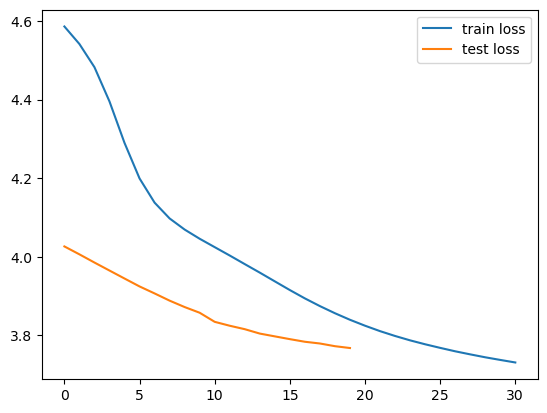

In [40]:
plt.plot(TRAIN_LOSS, label="train loss")
plt.plot(TEST_LOSS, label="test loss")
plt.legend()

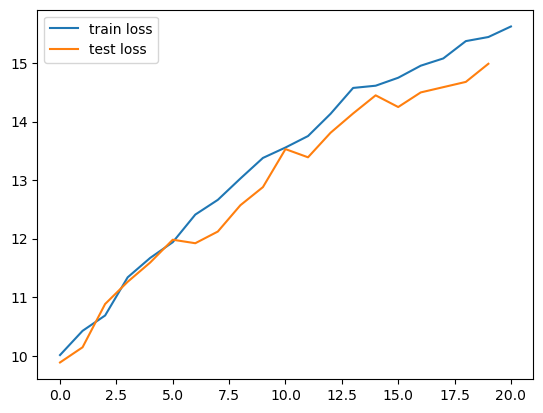

In [41]:
plt.plot(TRAIN_ACC, label="train loss")
plt.plot(TEST_ACC, label="test loss")
plt.legend()

In [38]:
def eval_model(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_function: torch.nn.Module,
    accuracy_function: callable,
):

    loss, acc = 0, 0

    model = model.to("cuda")

    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X.to("cuda"))
            loss += loss_function(y_pred, y.to("cuda")).item()
            acc += accuracy_function(y, torch.argmax(y_pred.cpu(), axis=1))

        loss = loss / len(data_loader)
        acc = acc / len(data_loader)

    return {"model_name ": model.__class__.__name__, "loss": loss, "accuracy": acc}

In [39]:
eval_model(model0, test_data_loader, loss_function, accuracy)

{'model_name ': 'pictureIdentificationModel',
 'loss': 3.767379075955278,
 'accuracy': 14.986022364217252}

In [51]:
class pictureIdentificationModel_V1(nn.Module):
    def __init__(self, input_shape, output_shape, hidden_layers):
        super().__init__()

        self.layer_1 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_layers),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layers, out_features=hidden_layers),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layers, out_features=output_shape),
        )
        
    def forward(self, x):
        x = self.layer_1(x)
        return x

In [54]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device


device(type='cuda', index=0)

In [55]:
model_1 = pictureIdentificationModel_V1(3*32*32, 100, 512).to(device)

In [56]:
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_1.parameters(), lr=0.001)

In [57]:
for epoch in tqdm(range(EPOCHS)):

    print(f"Epoch {epoch+1} of {EPOCHS} \n ------------------------------")
    train_epoch_loss = 0
    train_acc = 0

    for batch, (X, y) in enumerate(train_data_loader):

        y_pred = model_1(X.to(device))

        loss = loss_function(y_pred, y.to(device))

        train_acc += accuracy(y, torch.argmax(y_pred.cpu(), axis=1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        train_epoch_loss += loss.item()

        if batch % 500 == 0:
            print(f"Batch {batch} of {len(train_data_loader)}")

    train_epoch_loss = train_epoch_loss / len(train_data_loader)
    train_acc = train_acc / len(train_data_loader)

    TRAIN_LOSS.append(train_epoch_loss)
    TRAIN_ACC.append(train_acc)

    with torch.inference_mode():
        test_epoch_loss = 0
        test_acc = 0
        for X, y in test_data_loader:
            y_pred = model_1(X.to(device))
            loss = loss_function(y_pred, y.to(device))
            test_epoch_loss += loss.item()
            test_acc += accuracy(y, torch.argmax(y_pred.cpu(), axis=1))
            
        test_epoch_loss = test_epoch_loss / len(test_data_loader)
        test_acc = test_acc / len(test_data_loader)
        
        TEST_LOSS.append(test_epoch_loss)
        TEST_ACC.append(test_acc)
    
    print(f"Train Loss: {train_epoch_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Test Loss: {test_epoch_loss:.4f}, Test Acc: {test_acc:.4f}")
    print("---------------------------------")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1 of 10 
 ------------------------------
Batch 0 of 1563
Batch 500 of 1563
Batch 1000 of 1563
Batch 1500 of 1563
Train Loss: 4.6003, Train Acc: 1.2276
Test Loss: 4.5940, Test Acc: 1.2780
---------------------------------
Epoch 2 of 10 
 ------------------------------
Batch 0 of 1563
Batch 500 of 1563
Batch 1000 of 1563
Batch 1500 of 1563
Train Loss: 4.5879, Train Acc: 1.4355
Test Loss: 4.5816, Test Acc: 1.9868
---------------------------------
Epoch 3 of 10 
 ------------------------------
Batch 0 of 1563
Batch 500 of 1563
Batch 1000 of 1563
Batch 1500 of 1563
Train Loss: 4.5734, Train Acc: 2.3373
Test Loss: 4.5652, Test Acc: 2.0068
---------------------------------
Epoch 4 of 10 
 ------------------------------
Batch 0 of 1563
Batch 500 of 1563
Batch 1000 of 1563
Batch 1500 of 1563
Train Loss: 4.5537, Train Acc: 2.6292
Test Loss: 4.5421, Test Acc: 2.9353
---------------------------------
Epoch 5 of 10 
 ------------------------------
Batch 0 of 1563
Batch 500 of 1563
Batch 1000 

In [58]:
eval_model(model_1, test_data_loader, loss_function, accuracy)

{'model_name ': 'pictureIdentificationModel_V1',
 'loss': 4.165396902888728,
 'accuracy': 6.829073482428115}

In [80]:
class ImageClassificationModel_V2(nn.Module):
    def __init__(self, input_shape, output_shape, hidden_layers):
        super().__init__()

        self.Conv_block1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_layers,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_layers,
                out_channels=hidden_layers,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.Conv_block2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_layers,
                out_channels=hidden_layers,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_layers,
                out_channels=hidden_layers,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_layers * 8 * 8, hidden_layers),
            nn.ReLU(),
            nn.Linear(hidden_layers, output_shape),
        )

    def forward(self, x):
        x = self.Conv_block1(x)
        # print(x.shape)
        x = self.Conv_block2(x)
        # print(x.shape)
        x = self.classifier(x)
        return x

In [81]:
model_2 = ImageClassificationModel_V2(3, 100, 32).to(device)

In [82]:
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [83]:
EPOCHS = 10


TRAIN_LOSS = []
TEST_LOSS = []

TRAIN_ACC = []
TEST_ACC = []

In [93]:
for epoch in tqdm(range(EPOCHS)):

    print(f"Epoch {epoch+1} of {EPOCHS} \n ------------------------------")
    train_epoch_loss = 0
    train_acc = 0
    

    for batch, (X, y) in enumerate(train_data_loader):

        y_pred = model_2(X.to(device))

        loss = loss_function(y_pred, y.to(device))

        train_acc += accuracy(y, torch.argmax(y_pred.cpu(), axis=1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        train_epoch_loss += loss.item()

        # if batch % 100 == 0:
        #     print(f"Batch {batch} of {len(train_data_loader)}")

    train_epoch_loss = train_epoch_loss / len(train_data_loader)
    train_acc = train_acc / len(train_data_loader)

    TRAIN_LOSS.append(train_epoch_loss)
    TRAIN_ACC.append(train_acc)

    with torch.inference_mode():
        test_epoch_loss = 0
        test_acc = 0
        for X, y in test_data_loader:
            y_pred = model_2(X.to(device))
            loss = loss_function(y_pred, y.to(device))
            test_epoch_loss += loss.item()
            test_acc += accuracy(y, torch.argmax(y_pred.cpu(), axis=1))
            
        test_epoch_loss = test_epoch_loss / len(test_data_loader)
        test_acc = test_acc / len(test_data_loader)
        
        TEST_LOSS.append(test_epoch_loss)
        TEST_ACC.append(test_acc)
    
    print(f"Train Loss: {train_epoch_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Test Loss: {test_epoch_loss:.4f}, Test Acc: {test_acc:.4f}")
    print("---------------------------------")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1 of 10 
 ------------------------------
Train Loss: 2.1363, Train Acc: 42.6643
Test Loss: 3.2524, Test Acc: 27.1865
---------------------------------
Epoch 2 of 10 
 ------------------------------
Train Loss: 2.1345, Train Acc: 42.7663
Test Loss: 3.1424, Test Acc: 28.9237
---------------------------------
Epoch 3 of 10 
 ------------------------------
Train Loss: 2.1241, Train Acc: 43.0762
Test Loss: 3.1701, Test Acc: 27.2364
---------------------------------
Epoch 4 of 10 
 ------------------------------
Train Loss: 2.1242, Train Acc: 43.0082
Test Loss: 3.1556, Test Acc: 27.2165
---------------------------------
Epoch 5 of 10 
 ------------------------------
Train Loss: 2.1074, Train Acc: 43.2941
Test Loss: 3.2512, Test Acc: 27.1066
---------------------------------
Epoch 6 of 10 
 ------------------------------
Train Loss: 2.1091, Train Acc: 43.3781
Test Loss: 3.2397, Test Acc: 27.8155
---------------------------------
Epoch 7 of 10 
 ------------------------------
Train Loss:

In [94]:
eval_model(model_2, test_data_loader, loss_function, accuracy)

{'model_name ': 'ImageClassificationModel_V2',
 'loss': 3.0847573329846316,
 'accuracy': 28.724041533546327}

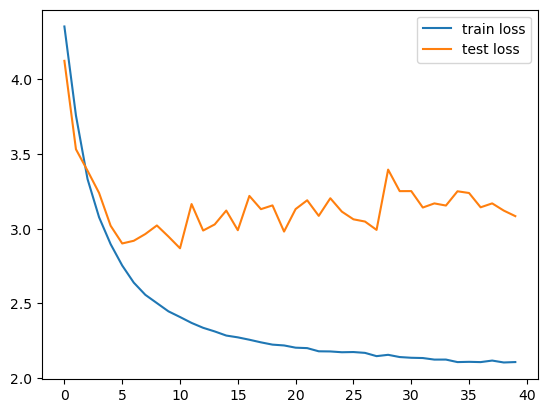

In [95]:
plt.plot(TRAIN_LOSS, label="train loss")
plt.plot(TEST_LOSS, label="test loss")
plt.legend()

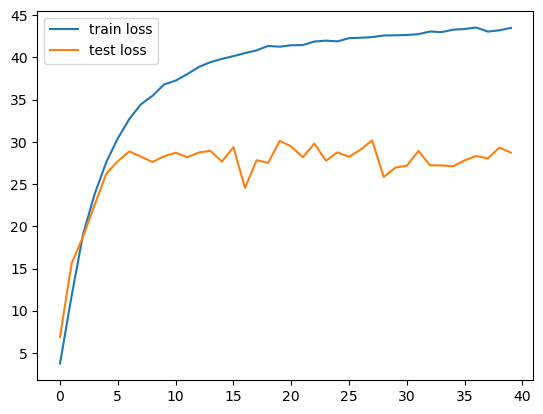

In [96]:
plt.plot(TRAIN_ACC, label="train loss")
plt.plot(TEST_ACC, label="test loss")
plt.legend()